# Stats 507 PS2 - Chittaranjan Velambur Rajan

In [1]:
# imports used for this file
from IPython.core.display import display, Markdown
import matplotlib.pyplot as plt
import random
from os.path import exists
import pandas as pd
from collections import defaultdict
import timeit
import numpy as np

# Q0 - Code review warmup

## Sample Code Snippet
```
sample_list = [(1, 3, 5), (0, 1, 2), (1, 9, 8)]
op = []
for m in range(len(sample_list)):
    li = [sample_list[m]]
        for n in range(len(sample_list)):
            if (sample_list[m][0] == sample_list[n][0] and
                    sample_list[m][3] != sample_list[n][3]):
                li.append(sample_list[n])
        op.append(sorted(li, key=lambda dd: dd[3], reverse=True)[0])
res = list(set(op))
```

## Sample Code Snippet - Modified

In [2]:
sample_list = [(1, 3, 5), (0, 1, 2), (1, 9, 8)]
op = []
for m in range(len(sample_list)):
    li = [sample_list[m]]
    for n in range(len(sample_list)):
        if (sample_list[m][0] == sample_list[n][0] and
                sample_list[m][2] != sample_list[n][2]):
            li.append(sample_list[n])
    op.append(sorted(li, key=lambda dd: dd[2], reverse=True)[0])
res = list(set(op))

print(res)

[(0, 1, 2), (1, 9, 8)]


#### Modifications
- Removed indents on lines 5-9
- Changed indexing of [3] to [2] to fix IndexOutOfBounds

#### Summary -- Part (a)
This snippet, at a high level, transforms an input list of tuples
into an output list of tuples with specific properties

For each tuple of the input list, say `x`, the output has a
corresponding$^{*}$ tuple `y` which has the largest last element among
all tuples (including `x`) which share the first element (index=0) but
have a different last element.

$^{*}$ The output list has no duplicate tuples, so it does not
necessarily have a 1-1 mapping to each element from the input list.

#### Code Review Comments -- Part (b)
1. Readability:
    - When not obvious, it is helpful to leave a comment
(or better, docstring) describing what the code does. This way,
the reviewer is able to grasp the intent of the code without having to
first understand it entirely.
    - Use more meaningful variables names (and avoid
[Hungarian Notation](https://en.wikipedia.org/wiki/Hungarian_notation))
like `sample_list` or `li` which only give information about the type
of a variable but not the contents itself.
1. Performance: Make sure to not have the code do more than what is needed.
    - To retrieve the maximum or minimum value of a list, it is overkill
to sort the entire list. Instead make use of the `max` or `min` function.
    - In looping constucts, use of for-each loops may be preferred over
counting loops, i.e `for val in vals:` as opposed to
`for i in range(len(vals)`. Of course, there will be scenarios where
the latter is unavoidable, but it is best to try to aim for the former.
This is because the extra dereference of `vals[i]` is slightly more
expensive and it can add up.
1. Testability:
    - It is recommended to have unit tests that can describe most
common scenarios of how this code is expected to be used, and validate
results against them
    - An external code review can be more fruitful after an internal
or self-review of the code, as the trivial bugs are caught earlier and
more time may be spent on the non-trivial details

# Q1 - List of Tuples

In [3]:
def generate_random_table(n, k=3, low=1, high=100):
    """
    Generates a list of tuples using numbers between `low` and `high`.

    Parameters
    ----------
    n : int
        The number of records in the table.
    k : int, optional
        The number of items in each table. The default is 3.
    low : int, optional
        The minimum possible value of any item in the table. The default is 1.
    high : int, optional
        One more than the maximum value of any item in the table. 
        The default is 100.

    Returns
    -------
    list
        A list of n k-tuples, each bearing values between low and high.

    """
    return [
        tuple(row)
        for row in np.random.randint(low, high, size=(n, k))
    ]

In [4]:
data = generate_random_table(5, k=3, low=1, high=100)
print(data)

assert(isinstance(data, list))
for record in data:
    assert(isinstance(record, tuple))

[(42, 13, 53), (62, 51, 3), (99, 50, 83), (39, 28, 84), (93, 22, 51)]


# Q2 - Refactor the Snippet

#### Encapsulate and Parameterize -- Part (a)

In [5]:
def transform_max(input_list, idx_a=0, idx_b=-1):
    """
    Given a list of tuples, maps each tuple `x` to another tuple `y` belonging
    to the input, which has the largest value at `idx_b`, and the same 
    value as `x` at `idx_a`

    Runs in O(n^2) time and O(1) space

    Parameters
    ----------
    input_list : list
        List of tuples, can be of arbitrary (but fixed for all) length.
    idx_a : int, optional
        The index at which equality must be checked. The default is 0.
    idx_b : int, optional
        The index at which inequality must be checked. The default is -1.

    Returns
    -------
    res : list
        List of unique tuples which have been mapped as per above properties.

    """
    op = []
    for m in range(len(input_list)):
        li = [input_list[m]]
        for n in range(len(input_list)):
            if (input_list[m][idx_a] == input_list[n][idx_a] and
                    input_list[m][idx_b] != input_list[n][idx_b]):
                li.append(input_list[n])
        op.append(sorted(li, key=lambda dd: dd[idx_b], reverse=True)[0])
    res = list(set(op))
    return res

In [6]:
print(transform_max([(1, 3, 5), (0, 1, 2), (1, 9, 8)], 0, 2))

[(0, 1, 2), (1, 9, 8)]


#### Implement Suggestions from Code Review -- Part (b)

In [7]:
def test_transform(fn):
    """
    Unit tests some trivial examples of the transformation operation.

    Parameters
    ----------
    fn : function
        A callable that takes an input list of tuples, and optionally,
        two indices, to perform the transformation operation.

    Returns
    -------
    None.

    """
    inputs = [
        [],
        [(1, 2, 3)],
        [(1, 2, 3), (1, 2, 5)],
        [(1, 2, 1), (1, 2, 1)]
    ]
    outputs = [
        [],
        [(1, 2, 3)],
        [(1, 2, 5)],
        [(1, 2, 1)]
    ]
    for (inp, expected) in zip(inputs, outputs):
        actual = fn(inp, 0, 2)
        assert actual == expected, \
            f"Actual: {actual}, Expected: {expected}, Input: {inp}"


def transform_max_new(input_list, idx_a=0, idx_b=-1):
    """
    Given a list of tuples, maps each tuple `x` to another tuple `y` belonging
    to the input, which has the largest value at `idx_b`, and the same 
    value as `x` at `idx_a`

    Has a few optimizations as compared to `transform_max`, but still 
    runs in O(n^2) time and O(1) space

    Parameters
    ----------
    input_list : list
        List of tuples, can be of arbitrary (but fixed for all) length.
    idx_a : int, optional
        The index at which equality must be checked. The default is 0.
    idx_b : int, optional
        The index at which inequality must be checked. The default is -1.

    Returns
    -------
    list
        List of unique tuples which have been mapped as per above properties.

    """
    mapping = set()
    for l in input_list:
        candidates = [l]
        for r in input_list:
            if l[idx_a] == r[idx_a] and l[idx_b] != r[idx_b]:
                candidates.append(r)
        mapping.add(max(candidates, key=lambda c: c[idx_b]))
    return list(mapping)




In [8]:
test_transform(transform_max_new)

#### Write function from scratch -- Part (c)

In [9]:
def transform_max_alternate(input_list, idx_a=0, idx_b=-1):
    """
    Given a list of tuples, maps each tuple `x` to another tuple `y` belonging
    to the input, which has the largest value at `idx_b`, and the same 
    value as `x` at `idx_a`

    Runs in O(n) time and O(n) space

    Parameters
    ----------
    input_list : list
        List of tuples, can be of arbitrary (but fixed for all) length.
    idx_a : int, optional
        The index at which equality must be checked. The default is 0.
    idx_b : int, optional
        The index at which inequality must be checked. The default is -1.

    Returns
    -------
    list
        List of unique tuples which have been mapped as per above properties.

    """
    mapping = set()
    store = defaultdict(lambda: None)
    for l in input_list:
        store[l[idx_a]] = l if not (
            store[l[idx_a]]
        ) else max(
            store[l[idx_a]], l, key=lambda c: c[idx_b]
        )
    for l in input_list:
        candidate = store[l[idx_a]]
        mapping.add(candidate if l[idx_b] != candidate[idx_b] else l)
    return list(mapping)

In [10]:
test_transform(transform_max_alternate)

In [11]:
for _ in range(100):
    data = generate_random_table(random.randint(1, 100), low=1, high=100)
    # validate that each function works the same
    one = set(transform_max(data))
    two = set(transform_max_new(data))
    three = set(transform_max_alternate(data))
    assert(one == two == three)

#### Monte Carlo Study -- Part (d)

In [12]:
NUM_SIMULATIONS = 500

In [13]:
def monte_carlo(num_simulations):
    """
    Runs a Monte Carlo simulation with number of simulations as an argument.

    Generates random data and feeds it to each of the transform functions
    written above

    Parameters
    ----------
    num_simulations : int
        Number of simulations to run.

    Returns
    -------
    medians : dict
        For each function, a list of `num_simulations` medians.

    """
    times = defaultdict(list)
    medians = defaultdict(list)
    for _ in range(NUM_SIMULATIONS):
        data = generate_random_table(random.randint(1, 1000), low=1, high=100)
        for f in [transform_max, transform_max_new, transform_max_alternate]:
            t = timeit.timeit(
                "f(data)", globals={"f": f, "data": data}, number=1
            )
            times[f.__name__].append(t)
            medians[f.__name__].append(np.median(times[f.__name__]))
    return medians

In [14]:
medians = monte_carlo(NUM_SIMULATIONS)

In [15]:
# Create a dataframe with all median computation times
dat = pd.DataFrame({
    "Original Snippet (s)": [medians["transform_max"][-1]],
    "Review Improvements (s)": [medians["transform_max_new"][-1]],
    "Re-Written (s)": [medians["transform_max_alternate"][-1]],
})

display(
    Markdown(
        dat.to_markdown(index=False, tablefmt="github", floatfmt=".3e")
    )
)

|   Original Snippet (s) |   Review Improvements (s) |   Re-Written (s) |
|------------------------|---------------------------|------------------|
|              2.467e-02 |                 1.574e-02 |        3.683e-04 |

The table above presents the median time (in seconds) taken for the
execution of the function across all simulations  with the
randomly generated data.

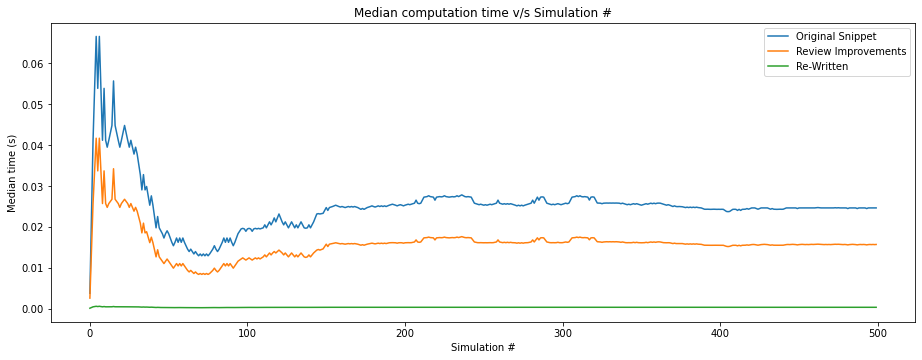

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1)

fig.set_size_inches(15.5, 5.5)

axes.set_title("Median computation time v/s Simulation #")
_ = axes.set_ylabel("Median time (s)")
_ = axes.set_xlabel("Simulation #")
_ = axes.plot(
    range(NUM_SIMULATIONS),
    medians["transform_max"],
    label="Original Snippet"
)
_ = axes.plot(
    range(NUM_SIMULATIONS),
    medians["transform_max_new"],
    label="Review Improvements"
)
_ = axes.plot(
    range(NUM_SIMULATIONS),
    medians["transform_max_alternate"],
    label="Re-Written"
)
_ = axes.legend()

The above plot depicts the stabilization of the median computation
time of each of the function, with the increase in number of simulations

### Summary
- The re-written code only loops over the entire list twice, so it is
computationally faster (running in O(n) time, but using O(n)
additional space)
- The code with slight improvements is still asymptotically O(n$^2$)
in time and O(1) in space, but is marginally faster due to minor
optimizations described in part Q0. b)
- The original code snippet performs the slowest, as it is inefficient
both in terms of asymptotic time complexity as well as minor code
optimizations

# Q3 - NHANES Data Clean


#### These functions are used across both part a) and b)

##### Utilities

In [17]:

def load_or_download(url):
    """
    Checks if file is available as a pickle locally, and if not downloads it
    from the provided URL (and then saves a pickle)

    Parameters
    ----------
    url : string
        URL to an XPT file.

    Returns
    -------
    DataFrame
        A df built after reading the data located at the url.

    """
    filename = url.split("/")[-1]
    if exists(filename):
        return pd.read_pickle(filename)
    df = pd.read_sas(url)
    df.to_pickle(filename)
    return df

In [18]:
def clean(config, filenames, cohorts, category_labels={}):
    """
    Reads xpt files and returns a clean dataframe based on config dict

    Parameters
    ----------
    config : dict
        Keys are the fields from the xpt that need to be retained.
        Values are what the column needs to be renamed to, and their dtype
    filenames : list
        Names of xpt files to be read.
    cohorts : list
        Strings representing the years which the data represents.

    Returns
    -------
    df : DataFrame
        Cleaned dataframe as per config.

    """

    frames = []
    for dataset, cohort_year in zip(filenames, cohorts):
        df = load_or_download(dataset)
        cols = config.keys()
        df = df[df.columns.intersection(cols)]
        df["cohort"] = cohort_year
        df["cohort"] = df["cohort"].astype("string")
        frames.append(df)

    df = pd.concat(frames)
    df = df.rename(columns={k: config[k][0] for k in config})
    for k in category_labels:
        if k in df.columns:
            df[k] = df[k].replace(category_labels[k])
    df = df.astype({
        config[k][0]:
            config[k][1] for k in config if config[k][0] in df.columns
    })
    return df.copy()

#### Demographics related configs -- Part (a)

In [19]:
cohorts = ["2011-12", "2013-14", "2015-16", "2017-18"]
demographics_config = {
    "SEQN": ("id", "int64"),
    "RIDAGEYR": ("age", "int8"),
    "RIAGENDR": ("gender", "category"),
    "RIDRETH3": ("race_ethnicity", "category"),
    "DMDEDUC2": ("education", "category"),
    "DMDMARTL": ("marital_status", "category"),
    "RIDSTATR": ("exam_status", "category"),
    "SDMVPSU": ("mvu_pseudo_psu", "float64"),
    "SDMVSTRA": ("mvu_pseudo_stratum", "float64"),
    "WTMEC2YR": ("mec_exam_weight", "float64"),
    "WTINT2YR": ("interview_weight", "float64")
}
demographics_filenames = [
    "https://wwwn.cdc.gov/Nchs/Nhanes/2011-2012/DEMO_G.XPT",
    "https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.XPT",
    "https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT",
    "https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.XPT"
]

demographics_category_labels = {
    "race_ethnicity": {
        1: "Mexican American",
        2: "Other Hispanic",
        3: "Non-Hispanic White",
        4: "Non-Hispanic Black",
        6: "Non-Hispanic Asian",
        7: "Other Race - Including Multi-Racial",
    },
    "education": {
        1: "Less than 9th grade",
        2: "9-11th grade (Includes 12th grade with no diploma)",
        3: "High school graduate/GED or equivalent",
        4: "Some college or AA degree",
        5: "College graduate or above",
        7: "Refused",
        9: "Don't Know",
        ".": "Missing"
    },
    "marital_status": {
        1: "Married",
        2: "Widowed",
        3: "Divorced",
        4: "Separated",
        5: "Never married",
        6: "Living with partner",
        77: "Refused",
        99: "Don't Know",
        ".": "Missing"
    },
    "exam_status": {
        1: "Interviewed only",
        2: "Both interviewed and MEC examined"
    },
    "gender": {
        1: "Male",
        2: "Female"
    }
}

#### Dentition Related Config -- Part (b)

In [20]:
dentition_config = {
    "SEQN": ("id", "int64"),
    "OHDDESTS": ("ohx_status", "category")
}

dentition_category_labels = {
    "ohx_status": {
        1: "Complete",
        2: "Partial",
        3: "Not Done"
    }
}

generic_labels_TC = {
    1: "Primary tooth (deciduous) present",
    2: "Permanent tooth present",
    3: "Dental implant",
    4: "Tooth not present",
    5: "Permanent dental root fragment present",
    9: "Could not assess",
    ".": "Missing"
}
for i in map(str, range(1, 33)):
    num = str.rjust(i, 2, "0")
    col_name = "OHX" + num + "TC"
    dentition_config[col_name] = ("tooth_count_" + num, "category")
    dentition_category_labels["tooth_count_" + num] = generic_labels_TC

generic_labels_CTC = {
    "A": "Primary tooth with a restored surface condition",
    "D": "Sound primary tooth",
    "E": "Missing due to dental disease",
    "F": "Permanent tooth with a restored surface condition",
    "J": "Permanent root tip is present but no restorative \
        replacement is present",
    "K": "Primary tooth with a dental carious surface condition",
    "M": "Missing due to other causes",
    "P": "Missing due to dental disease but replaced by a removable \
        restoration",
    "Q": "Missing due to other causes but replaced by a removable \
        restoration",
    "R": "Missing due to dental disease but replaced by a fixed restoration",
    "S": "Sound permanent tooth",
    "T": "Permanent root tip is present but a restorative replacement \
        is present",
    "U": "Unerupted",
    "X": "Missing due to other causes but replaced by a fixed restoration",
    "Y": "Tooth present, condition cannot be assessed",
    "Z": "Permanent tooth with a dental carious surface condition",
    "": "Missing"
}

for i in map(str, range(2, 32)):
    num = str.rjust(i, 2, "0")
    col_name = "OHX" + num + "CTC"
    dentition_config[col_name] = ("coronal_caries_" + num, "category")
    dentition_category_labels["coronal_caries_" + num] = generic_labels_CTC

dentition_filenames = [
    "https://wwwn.cdc.gov/Nchs/Nhanes/2011-2012/OHXDEN_G.XPT",
    "https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/OHXDEN_H.XPT",
    "https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/OHXDEN_I.XPT",
    "https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/OHXDEN_J.XPT"
]

#### Shape of dataframes -- Part (c)

In [21]:
df = clean(
    demographics_config,
    demographics_filenames,
    cohorts,
    category_labels=demographics_category_labels
)
print(df["gender"].describe())
print("SHAPE:", df.shape)
df.to_pickle("demographics.pickle")

count      39156
unique         2
top       Female
freq       19848
Name: gender, dtype: object
SHAPE: (39156, 12)


In [22]:
df = clean(
    dentition_config,
    dentition_filenames,
    cohorts,
    category_labels=dentition_category_labels
)
print("SHAPE:", df.shape)
df.to_pickle("dentition.pickle")

SHAPE: (35909, 63)
